In [1]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from plotnine import *
import plotnine
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes

In [2]:
df4 = pd.read_csv("/Users/alishaalex/Desktop/Datasets/cat/category_2020.csv")
df5 = pd.read_csv("/Users/alishaalex/Desktop/Datasets/cat/category_2021.csv")

print('Dimension data: {} rows & {} columns'.format(len(df4),len(df4.columns)))
print('Dimension data: {} rows & {} columns'.format(len(df5),len(df5.columns)))


Dimension data: 3964 rows & 33 columns
Dimension data: 6250 rows & 33 columns


In [3]:
dfr = pd.concat([df4, df5], ignore_index=True)
print('Dimension data: {} rows & {} columns'.format(len(dfr),len(dfr.columns)))

Dimension data: 10214 rows & 33 columns


In [4]:
df_11 = dfr.dropna()

In [5]:
print('Dimension data: {} rows & {} columns'.format(len(df_11),len(df_11.columns)))

Dimension data: 10214 rows & 33 columns


In [6]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10214 entries, 0 to 10213
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rsex       10214 non-null  object
 1   ReligSum   10214 non-null  object
 2   SupParty   10214 non-null  object
 3   ClosePty   10214 non-null  object
 4   PartyIDN   10214 non-null  object
 5   Politics   10214 non-null  int64 
 6   Spend1     10214 non-null  object
 7   TaxSpend   10214 non-null  object
 8   AnyBN3     10214 non-null  object
 9   Dole       10214 non-null  object
 10  dolefidl   10214 non-null  int64 
 11  sochelp    10214 non-null  int64 
 12  welfhelp   10214 non-null  int64 
 13  damlives   10214 non-null  int64 
 14  proudwlf   10214 non-null  int64 
 15  redistrb   10214 non-null  int64 
 16  richlaw    10214 non-null  int64 
 17  wealth     10214 non-null  int64 
 18  Indust4    10214 non-null  int64 
 19  BigBusnn   10214 non-null  int64 
 20  NatIdGB    10214 non-null  o

In [7]:
scale_columns_1 = ['welfhelp','sochelp','dolefidl','damlives','proudwlf','redistrb','BigBusnn','wealth',
                 'richlaw','Indust4','tradvals','stifsent','deathapp','censor','wronglaw','CovWk1','CovWk2','CovWk3']
values_to_remove = [-1.0, -11.0, 9.0, -2.0,-1,8,8.0]

for column in scale_columns_1:
    df_11 = df_11[~df_11[column].isin(values_to_remove)]

In [8]:
values_to_check_1 = [-1, -1.0, -11.0, 9.0, -2.0]
columns_with_values_1 = df_11.columns[df_11.isin(values_to_check_1).any()]
print("Columns with specified values:", columns_with_values_1)

Columns with specified values: Index(['Politics'], dtype='object')


In [9]:
print('Dimension data: {} rows & {} columns'.format(len(df_11),len(df_11.columns)))

Dimension data: 3882 rows & 33 columns


In [10]:
kproto_data = df_11.copy()

Silhoutte Score Coefficient

In [16]:
from kmodes.kmodes import KModes
from kmodes import kprototypes
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

def mixed_distance(a, b, categorical=None, alpha=0.01):
    if categorical is None:
        num_score = kprototypes.euclidean_dissim(a, b)
        return num_score
    else:
        cat_index = categorical
        a_cat = []
        b_cat = []
        for index in cat_index:
            a_cat.append(a[index])
            b_cat.append(b[index])
        a_num = []
        b_num = []
        l = len(a)
        for index in range(l):
            if index not in cat_index:
                a_num.append(a[index])
                b_num.append(b[index])

        a_cat = np.array(a_cat).reshape(1, -1)
        a_num = np.array(a_num).reshape(1, -1)
        b_cat = np.array(b_cat).reshape(1, -1)
        b_num = np.array(b_num).reshape(1, -1)
        cat_score = kprototypes.matching_dissim(a_cat, b_cat)
        num_score = kprototypes.euclidean_dissim(a_num, b_num)
        return cat_score + num_score * alpha

def dm_prototypes(dataset, categorical=None, alpha=0.1):
    lenDataset = len(dataset)
    distance_matrix = np.zeros(lenDataset * lenDataset).reshape(lenDataset, lenDataset)
    for i in range(lenDataset):
        for j in range(lenDataset):
            x1 = dataset[i]
            x2 = dataset[j]
            distance = mixed_distance(x1, x2, categorical=categorical, alpha=alpha)
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix

# Load your specific DataFrame
# Replace "YourDataFrame.csv" with your actual file path
df = kproto_data



# Convert columns to the appropriate data types
# You should specify which columns are categorical and which are numeric
categorical_columns = ['Rsex', 'ReligSum', 'SupParty', 'ClosePty', 'PartyIDN', 'Spend1', 'TaxSpend',
                       'AnyBN3', 'Dole', 'NatIdGB', 'NHSSat', 'ECPolicy2', 'EURefV2', 'EURefb',]

numeric_columns = ['Politics', 'dolefidl', 'sochelp', 'welfhelp', 'damlives', 'proudwlf', 'redistrb',
                   'richlaw', 'wealth', 'Indust4', 'BigBusnn', 'deathapp', 'wronglaw', 'censor', 'tradvals', 'stifsent',
                  'CovWk1','CovWk2','CovWk3']

df[categorical_columns] = df[categorical_columns].astype(str)
df[numeric_columns] = df[numeric_columns].astype(float)

# Obtain an array of values from the DataFrame
data_array = df.values

# Specify categorical columns for the K-Prototypes algorithm
categorical_indices = [df.columns.get_loc(col) for col in categorical_columns]

# Calculate the distance matrix
distance_matrix = dm_prototypes(data_array, categorical=categorical_indices, alpha=0.1)

# Set the range of K values to test
K = range(2, 10)

silhouette_scores = dict()

# Perform clustering for different values of K
for k in K:
    untrained_model = kprototypes.KPrototypes(n_clusters=k, max_iter=20)
    trained_model = untrained_model.fit(data_array, categorical=categorical_indices)
    cluster_labels = trained_model.labels_
    score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
    silhouette_scores[k] = score

print("The K : Silhouette scores : ", silhouette_scores)


The K : Silhouette scores  {2: 0.17799341916174322, 3: 0.12776478499171806, 4: 0.10414090466642417, 5: 0.0684374443683939, 6: 0.06250370464385432, 7: 0.04765820466711369, 8: 0.0456431278018941, 9: 0.04215728612346691}


Elbow Method

In [12]:
kproto_data_1 = df_11.copy()

In [13]:
catColumnsPos = [kproto_data_1.columns.get_loc(col) for col in list(kproto_data_1.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(kproto_data_1.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Rsex', 'ReligSum', 'SupParty', 'ClosePty', 'PartyIDN', 'Spend1', 'TaxSpend', 'AnyBN3', 'Dole', 'NatIdGB', 'NHSSat', 'ECPolicy2', 'EURefV2', 'EURefb']
Categorical columns position  : [0, 1, 2, 3, 4, 6, 7, 8, 9, 20, 23, 24, 25, 26]


In [14]:
dfMatrix_1 = kproto_data_1.to_numpy()
dfMatrix_1

array([['Male', 'Other Christian', ' No', ..., 2, 2, 2],
       ['Female', 'No religion', ' No', ..., 3, 2, 4],
       ['Male', 'Other Christian', 'Yes', ..., 1, 1, 3],
       ...,
       ['Female', 'Other Christian', ' No', ..., 4, 3, 3],
       ['Male', 'Other Christian', ' No', ..., 4, 4, 3],
       ['Female', 'No religion', ' No', ..., 4, 3, 4]], dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


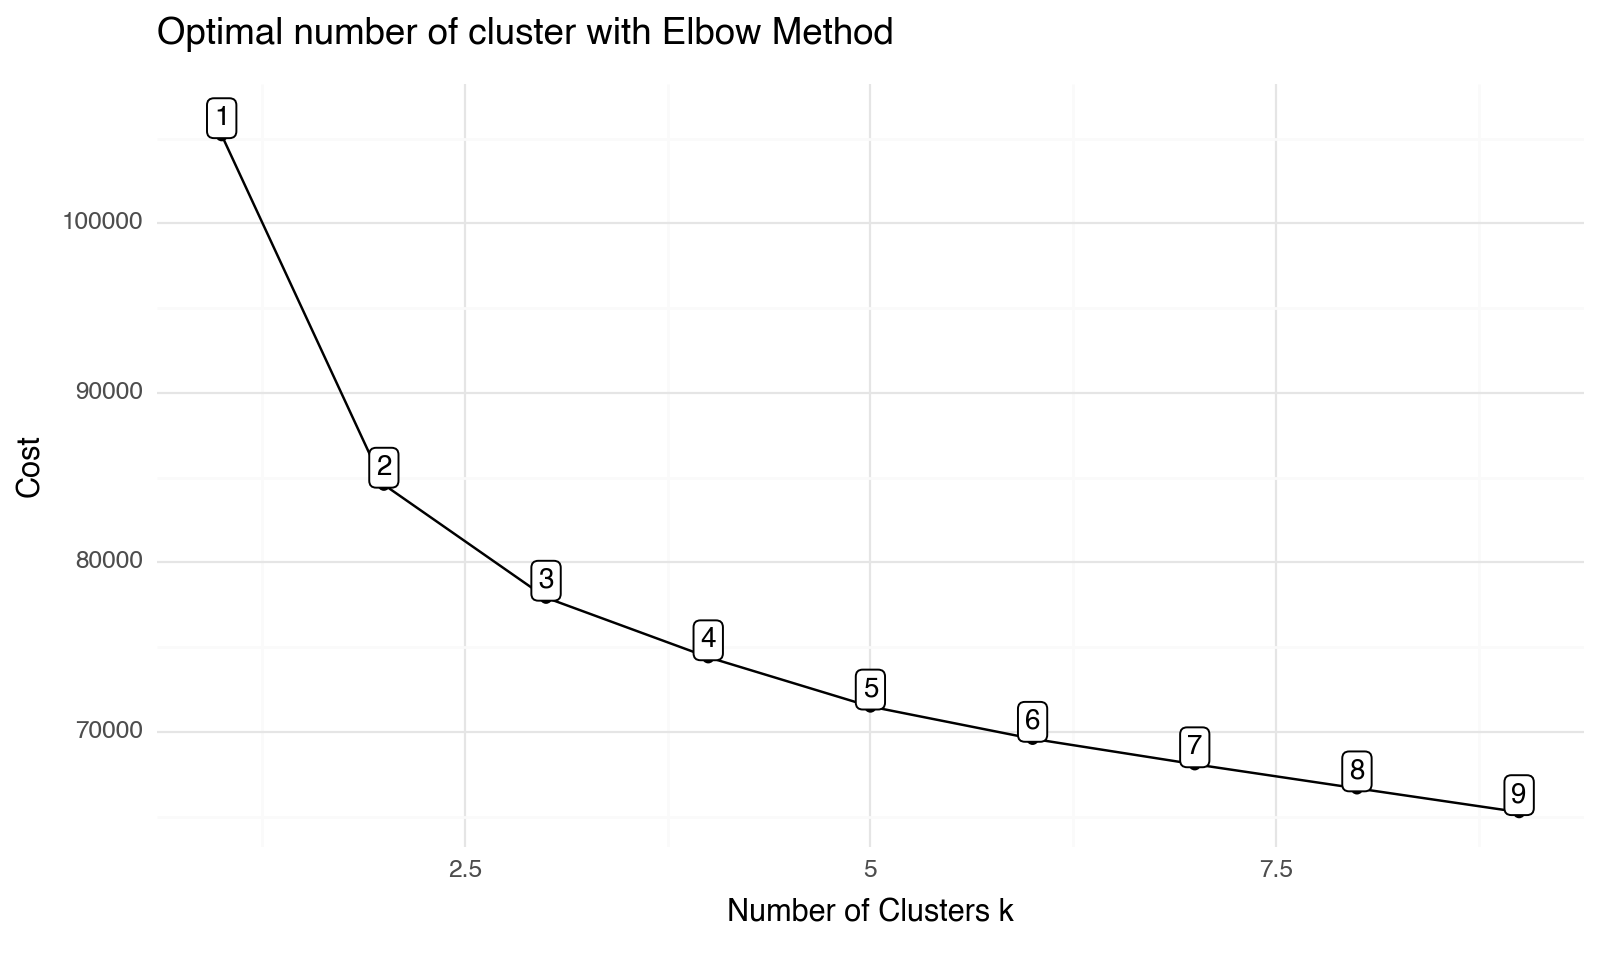

<Figure Size: (800 x 480)>

In [15]:
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        cluster_assignments = kprototype.fit_predict(dfMatrix_1, categorical=catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data=df_cost) +
    geom_line(aes(x='Cluster', y='Cost')) +
    geom_point(aes(x='Cluster', y='Cost')) +
    geom_label(aes(x='Cluster', y='Cost', label='Cluster'), size=10, nudge_y=1000) +
    labs(title='Optimal number of cluster with Elbow Method') +
    xlab('Number of Clusters k') +
    ylab('Cost') +
    theme_minimal()
)